**Credit Score - Label Collection**

Key Points:
* Goals: 
    * Visualize every data in dataset.
    * Determine Label dan Features.
    * Check Missing Values.
    * Check Outliers
* Recommendation:
    * Drop missing values.
    * Drop others in `person_ownership`.
    * Check `person_emp_lenght`.
    * Compare Baseline and Treatment 1 (Transform distribution)

# Library

In [1]:
#Basic Statistic & Visualzation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Visualization Function
from function.dev_vis import *

import os

# Dataset

In [2]:
dataset_path = r'C:\Users\juan\Documents\Portfolio Project\credit_score\dataset\credit_risk_dataset.csv'
#use index as id to identify data
dataset_raw = pd.read_csv(dataset_path)
dataset_raw.sample(5)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
14666,26,110400,MORTGAGE,3.0,PERSONAL,F,9800,NaN,0,0.09,Y,3
29251,40,125000,RENT,1.0,DEBTCONSOLIDATION,B,24250,NaN,0,0.19,N,17
31503,37,88000,MORTGAGE,3.0,HOMEIMPROVEMENT,B,6000,11.99,1,0.07,N,12
23789,30,65004,MORTGAGE,6.0,PERSONAL,A,7100,8.00,0,0.11,N,10
15748,24,162000,MORTGAGE,8.0,DEBTCONSOLIDATION,C,16000,15.96,0,0.10,Y,2


In [3]:
num = list(dataset_raw.describe().columns)
cat = list(dataset_raw.describe(include=object).columns)

# Exploratory Dataset Analysis (EDA)

## Raw Dataset

## Descriptive Statistic

In [4]:
dataset_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


`person_emp_length` and `loan_int_rate` has missing value.

In [5]:
#Numeric
dataset_raw.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


`person_age` and `person_emp_length` max data is doesn't make sense

In [6]:
#Categorical
dataset_raw.describe(include=object)

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
count,32581,32581,32581,32581
unique,4,6,7,2
top,RENT,EDUCATION,A,N
freq,16446,6453,10777,26836


## Distribution

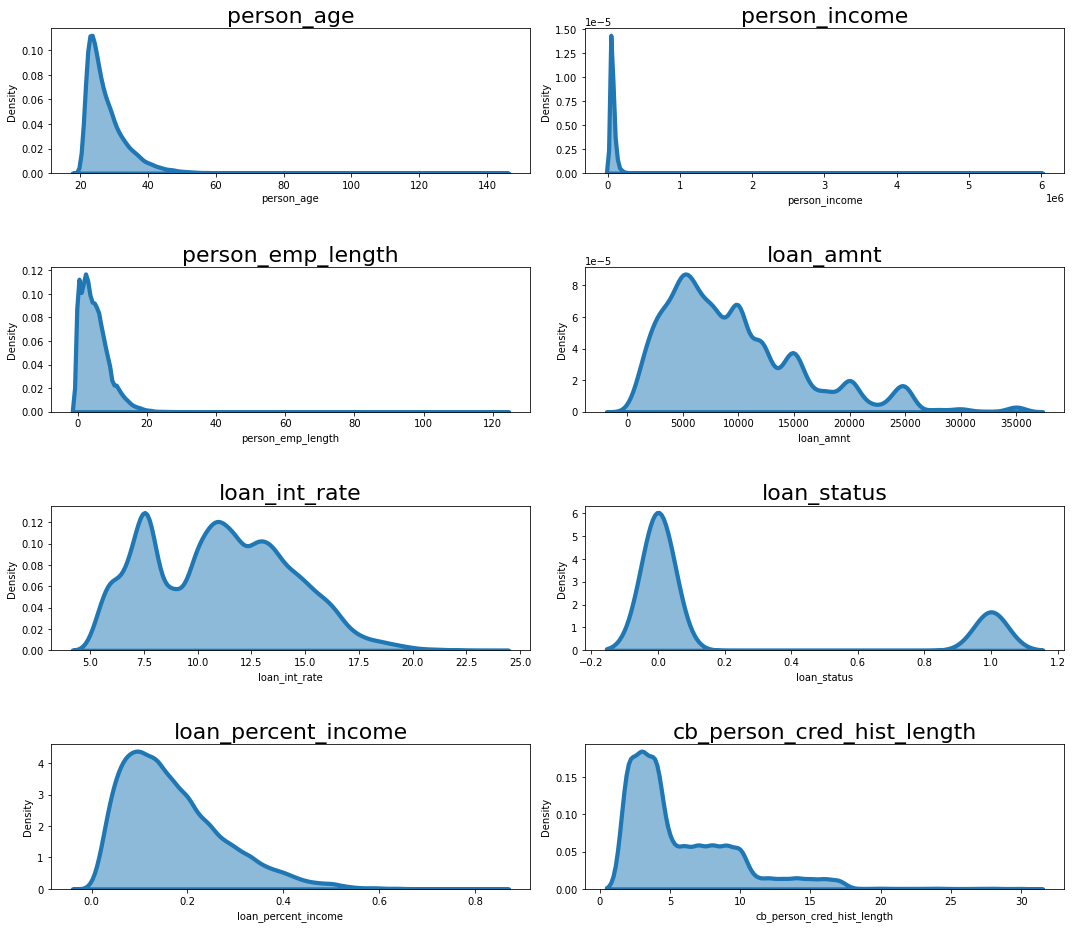

In [7]:
#Numerical
hist(dataset_raw,num)

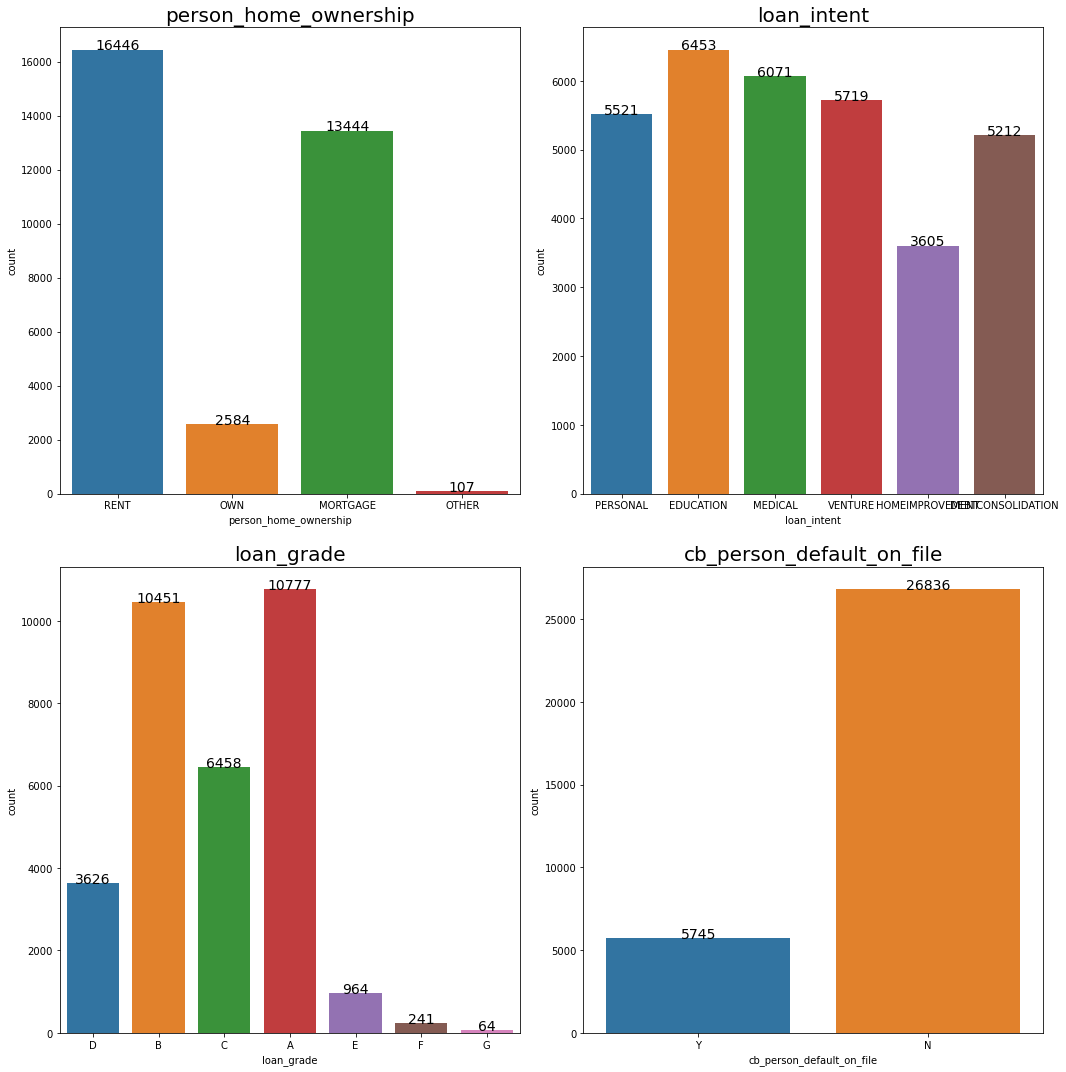

In [8]:
#Categorical
bar(dataset_raw,cat)

In [9]:
#Normal Test
normal(dataset_raw,num)

person_age : Not normal distribution
person_income : Not normal distribution
person_emp_length : Not normal distribution
loan_amnt : Not normal distribution
loan_int_rate : Not normal distribution
loan_status : Not normal distribution
loan_percent_income : Not normal distribution
cb_person_cred_hist_length : Not normal distribution


## Outliers

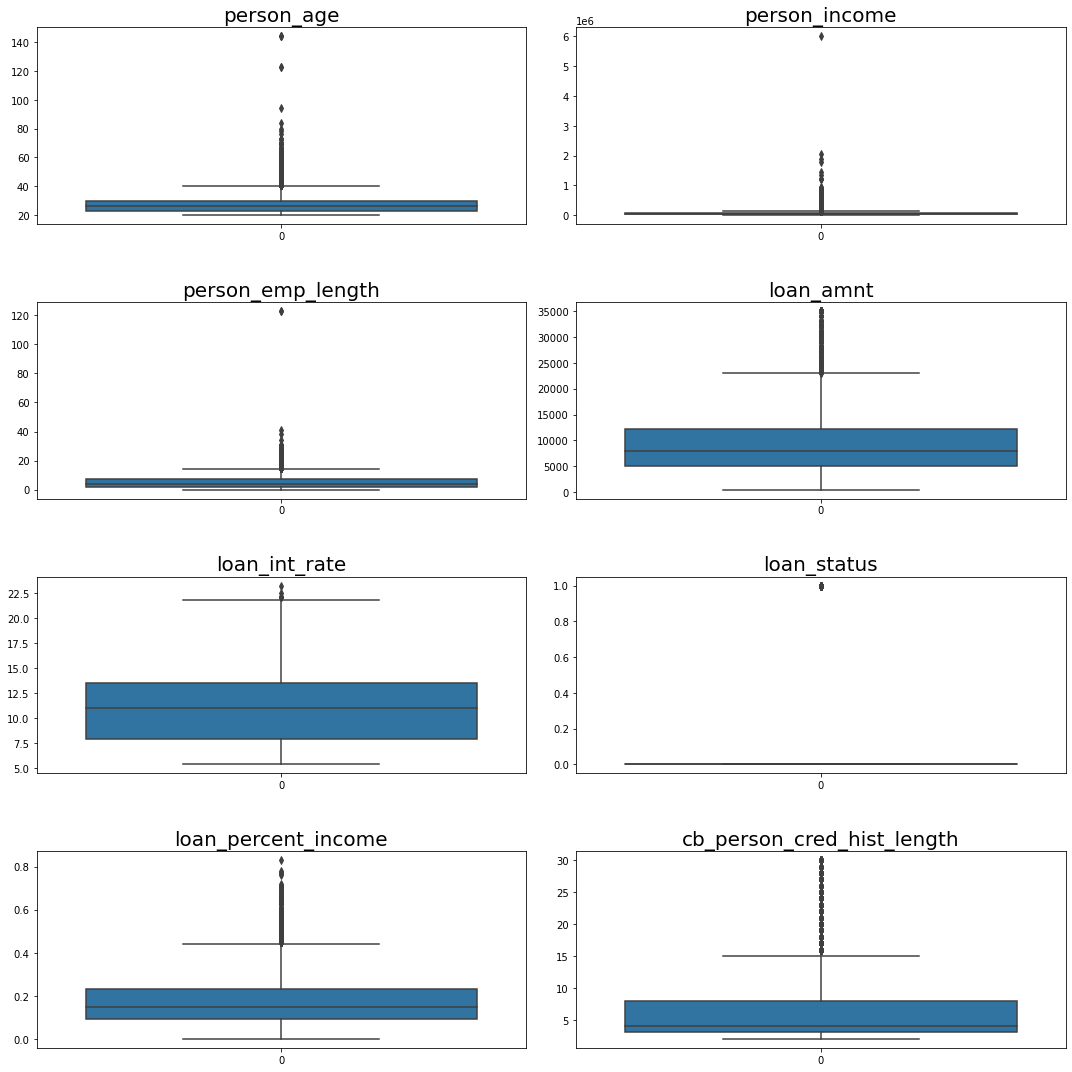

In [10]:
#Box Plot
box(dataset_raw,num)

In [11]:
#IQR
out(dataset_raw,num)


        person_age
        IQR : 7.0
        Upper IQR : 40.5
        Lower IQR : 12.5

        person_income
        IQR : 40700.0
        Upper IQR : 140250.0
        Lower IQR : -22550.0

        person_emp_length
        IQR : nan
        Upper IQR : nan
        Lower IQR : nan

        loan_amnt
        IQR : 7200.0
        Upper IQR : 23000.0
        Lower IQR : -5800.0

        loan_int_rate
        IQR : nan
        Upper IQR : nan
        Lower IQR : nan

        loan_status
        IQR : 0.0
        Upper IQR : 0.0
        Lower IQR : 0.0

        loan_percent_income
        IQR : 0.14
        Upper IQR : 0.44000000000000006
        Lower IQR : -0.12000000000000002

        cb_person_cred_hist_length
        IQR : 5.0
        Upper IQR : 15.5
        Lower IQR : -4.5


NaN value appeared because there are missing value

## Correlation

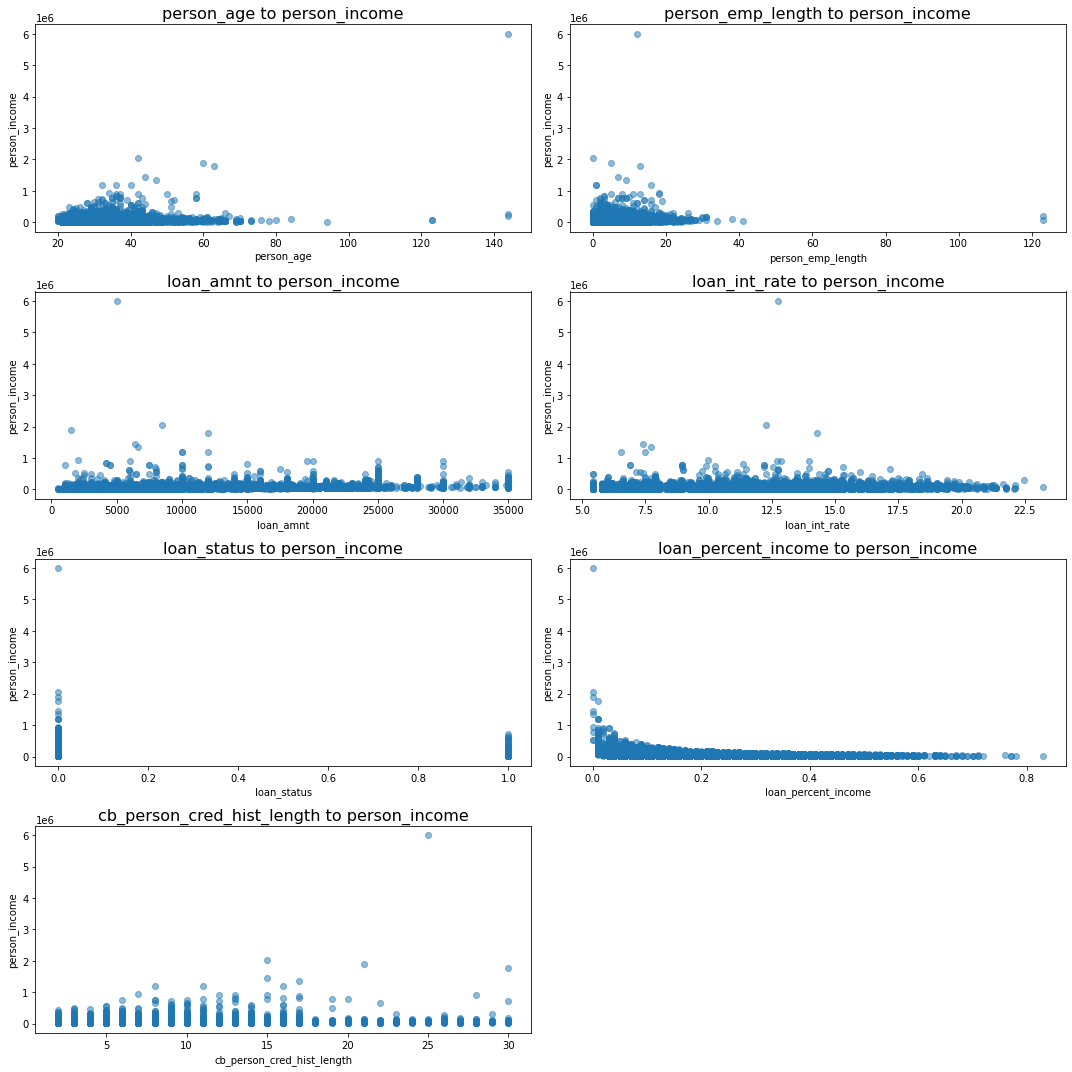

In [12]:
#Scatter Plot
scatter(dataset_raw, num, 'person_income')

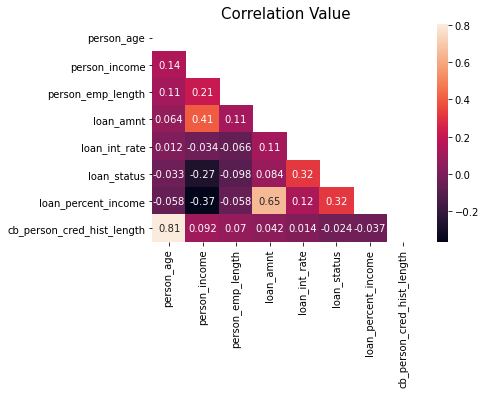

In [13]:
#Correlation
corr(dataset_raw,num)

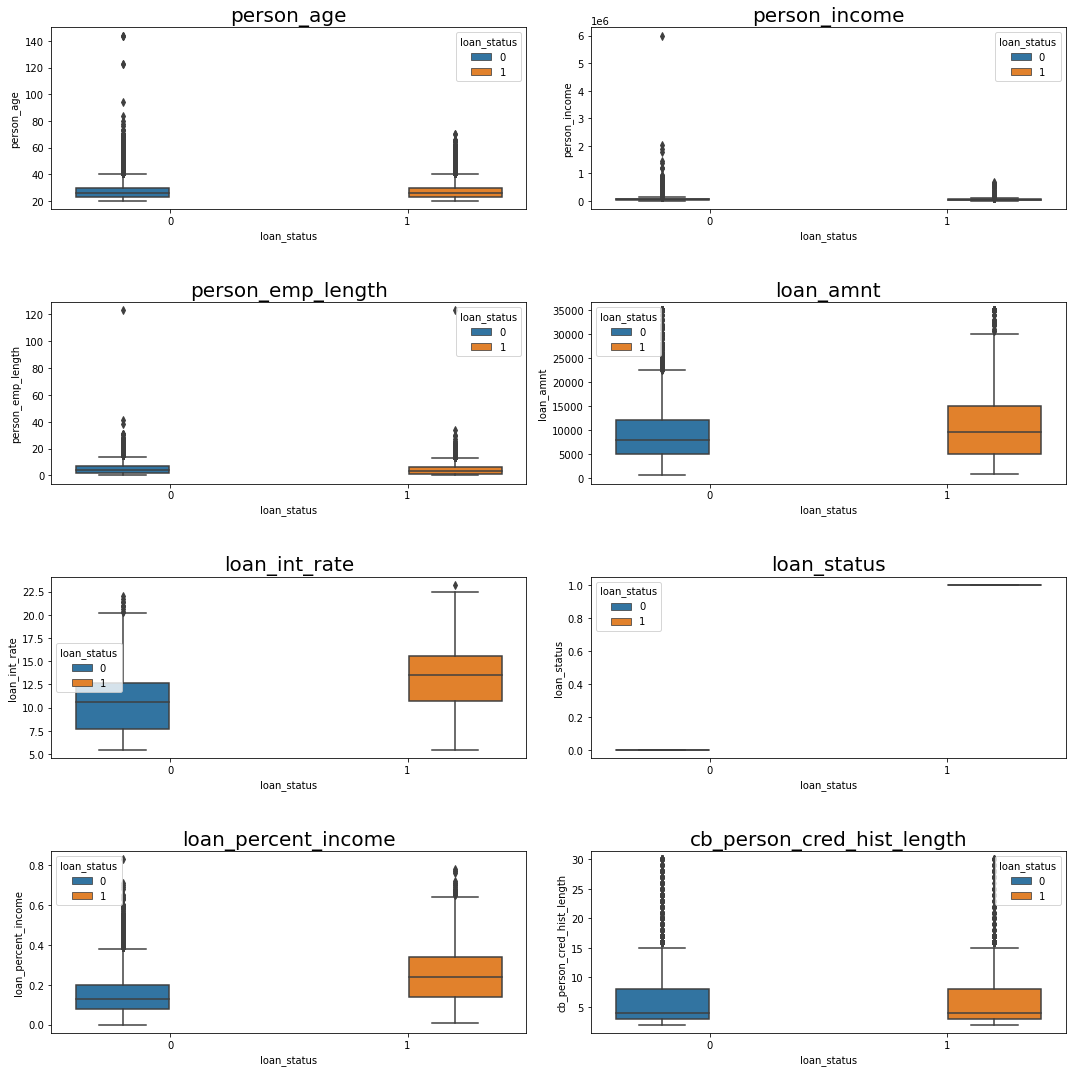

In [14]:
#Numerical
box(dataset_raw,num,'loan_status')

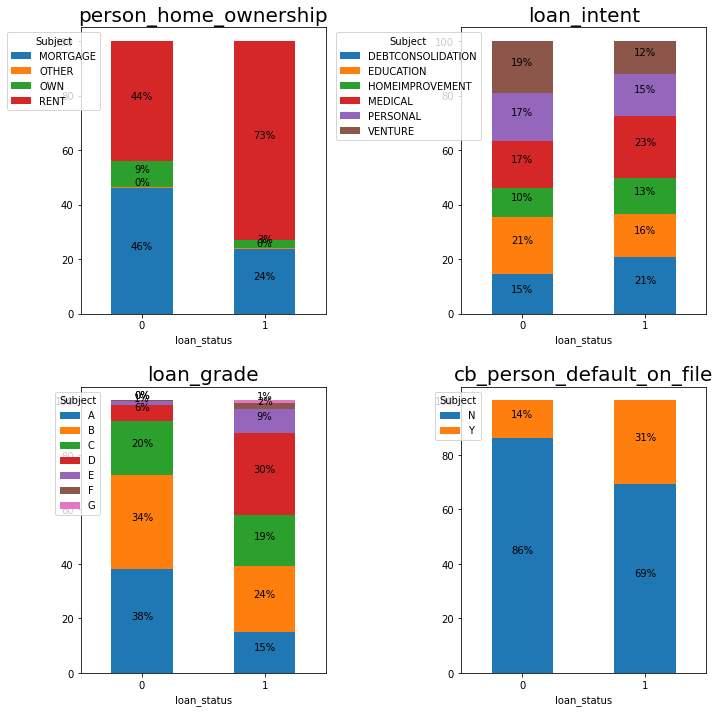

In [15]:
#Categorical
bar(dataset_raw,cat,'loan_status')

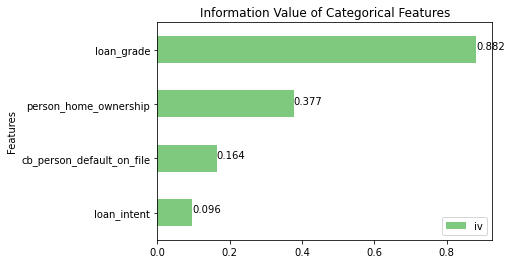

In [16]:
#IV
iv(dataset_raw,cat,'loan_status',1,0)

## Label Proportion

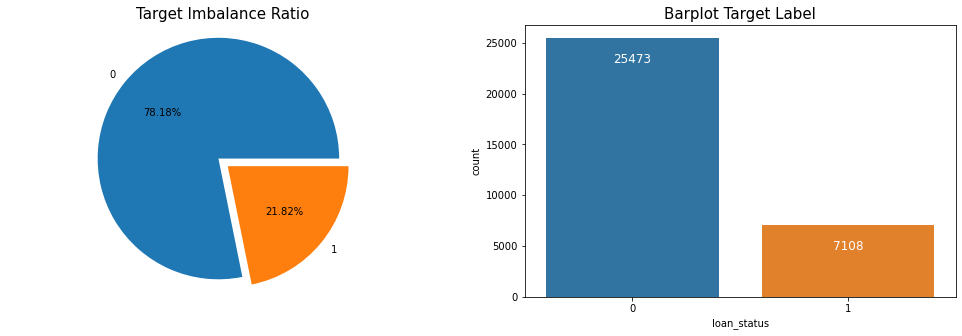

In [17]:
tar_pro(dataset_raw, 'loan_status')